In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
covertype = fetch_ucirepo(id=31)

# data (as pandas dataframes)
X = covertype.data.features
y = covertype.data.targets

# metadata
print(covertype.metadata)

# variable information
print(covertype.variables)


{'uci_id': 31, 'name': 'Covertype', 'repository_url': 'https://archive.ics.uci.edu/dataset/31/covertype', 'data_url': 'https://archive.ics.uci.edu/static/public/31/data.csv', 'abstract': 'Classification of pixels into 7 forest cover types based on attributes such as elevation, aspect, slope, hillshade, soil-type, and more.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 581012, 'num_features': 54, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['Cover_Type'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Sat Mar 16 2024', 'dataset_doi': '10.24432/C50K5N', 'creators': ['Jock Blackard'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting forest cover type from cartographic variables only (no remotely sensed data).  The actual forest cover type for a given observation (30 x 30 meter cell) was determined from

In [4]:
X.head(3)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y.head()

,Cover_Type
0,5
1,5
2,2
3,2
4,5


<Axes: xlabel='Elevation', ylabel='Count'>

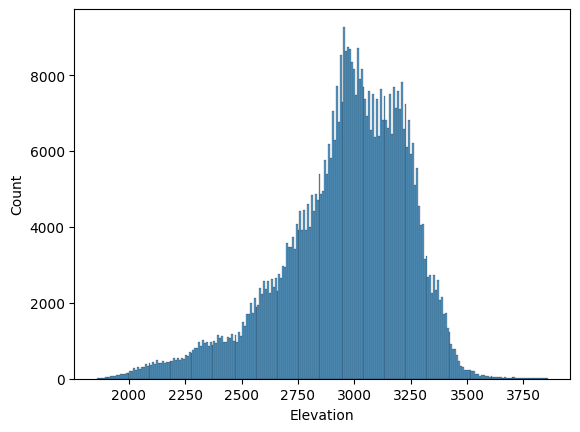

In [6]:
sns.histplot(x='Elevation', data = X)

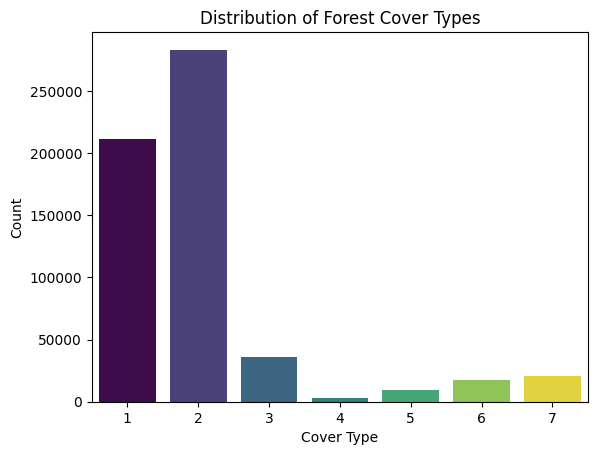

In [7]:
sns.countplot(x='Cover_Type', data=y, palette='viridis', hue='Cover_Type', legend=False)
plt.xlabel("Cover Type")
plt.ylabel("Count")
plt.title("Distribution of Forest Cover Types")
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_features = [
    "Elevation","Aspect","Slope",
    "Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points"
]

X[numeric_features] = scaler.fit_transform(X[numeric_features])

/tmp/ipython-input-227074531.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numeric_features] = scaler.fit_transform(X[numeric_features])


In [9]:
X.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
0,-1.297805,-0.935157,-1.482820,-0.053767,-0.796273,-1.180146,0.330743,0.439143,0.142960,3.246283,...,0,0,0,0,0,0,0,0,0,0
1,-1.319235,-0.890480,-1.616363,-0.270188,-0.899197,-1.257106,0.293388,0.590899,0.221342,3.205504,...,0,0,0,0,0,0,0,0,0,0
2,-0.554907,-0.148836,-0.681563,-0.006719,0.318742,0.532212,0.816364,0.742654,-0.196691,3.126965,...,0,0,0,0,0,0,0,0,0,0
3,-0.622768,-0.005869,0.520322,-0.129044,1.227908,0.474492,0.965786,0.742654,-0.536343,3.194931,...,0,0,0,0,0,0,0,0,0,0
4,-1.301377,-0.988770,-1.616363,-0.547771,-0.813427,-1.256464,0.293388,0.540313,0.195215,3.165479,...,0,0,0,0,0,0,0,0,0,0


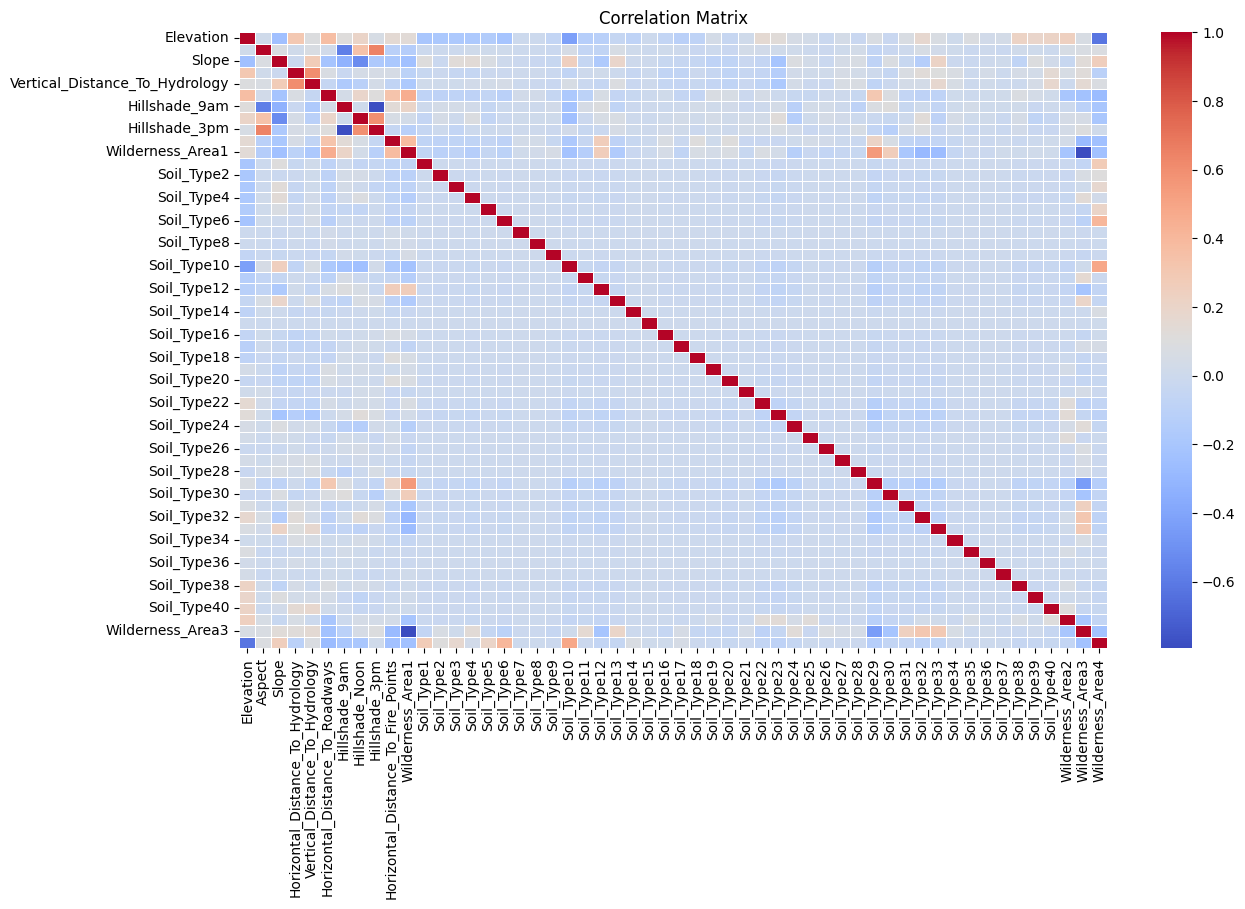

In [10]:
correlation_matrix = X.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

rf_classifier = RandomForestClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42)

In [13]:
# Convert to 1D NumPy array
y_train = y_train.to_numpy().ravel()  # flatten
y_test  = y_test.to_numpy().ravel()

# Shift labels from 1–7 → 0–6 (only if original labels start at 1)
y_train -= 1
y_test  -= 1

# Check unique values
import numpy as np
print("Train labels:", np.unique(y_train))
print("Test labels:", np.unique(y_test))


Train labels: [0 1 2 3 4 5 6]
Test labels: [0 1 2 3 4 5 6]


In [14]:
rf_classifier.fit(X_train, y_train)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [15]:
from sklearn.metrics import accuracy_score, classification_report

rf_predictions = rf_classifier.predict(X_test)
xgb_predictions = xgb_classifier.predict(X_test)

In [16]:
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_predictions))

print("\nRandom Forest Report:\n", classification_report(y_test, rf_predictions))
print("\nXGBoost Report:\n", classification_report(y_test, xgb_predictions))

Random Forest Accuracy: 0.9551388518368716
XGBoost Accuracy: 0.8711823274786366

Random Forest Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95     42557
           1       0.95      0.97      0.96     56500
           2       0.94      0.97      0.96      7121
           3       0.92      0.85      0.88       526
           4       0.94      0.77      0.85      1995
           5       0.94      0.90      0.92      3489
           6       0.97      0.95      0.96      4015

    accuracy                           0.96    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.96      0.96      0.95    116203


XGBoost Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85     42557
           1       0.87      0.90      0.88     56500
           2       0.90      0.91      0.91      7121
           3       0.91      0.86      0.89       526
          

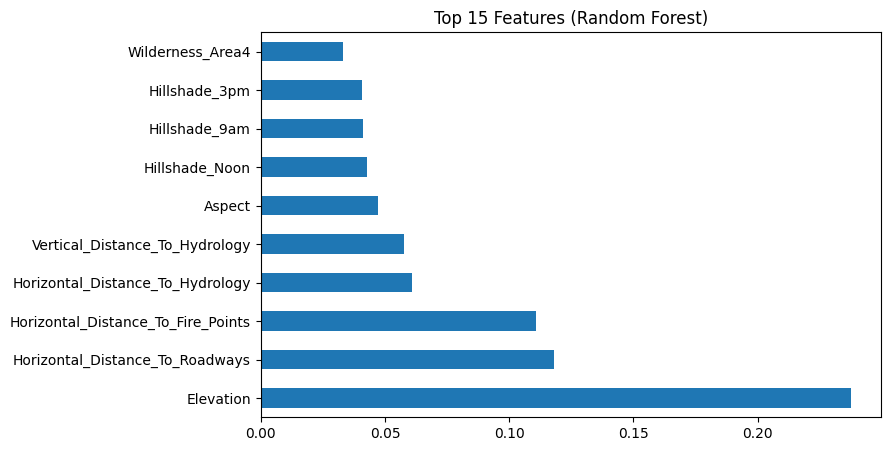

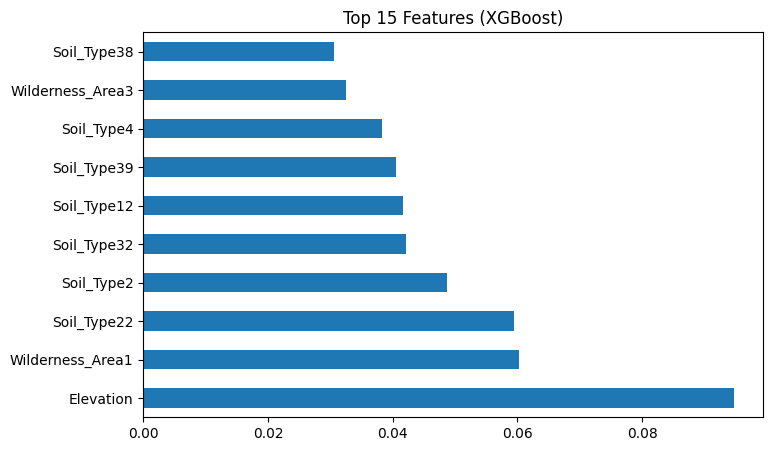

In [18]:
# Random Forest importances
rf_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)
top_rf = rf_importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
top_rf.plot(kind="barh")
plt.title("Top 15 Features (Random Forest)")
plt.show()

# XGBoost importances
xgb_importances = pd.Series(xgb_classifier.feature_importances_, index=X.columns)
top_xgb = xgb_importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
top_xgb.plot(kind="barh")
plt.title("Top 15 Features (XGBoost)")
plt.show()

### We can see that here Random Forest outperformed XGB in terms of accuracy and overall performance including f1 score.